In [1]:
#In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [5]:
#load the data set and then print it to see what it contains
all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


In [6]:
# Now need to define what a viral tweet is. I have gone when a tweet gets retweeted more than 1000 times is it deemed viral
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 1000, 1, 0)
print(np.median(all_tweets["retweet_count"]))
print(all_tweets['is_viral'].value_counts())

13.0
0    8972
1    2127
Name: is_viral, dtype: int64


In [10]:
# Now we will create features that determine whether a tweet will be viral or not
#The features I have decided to go with our length of a tweet, number of followers and number of friends
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets["followers_count"]= all_tweets.apply(lambda tweet: tweet['user']['followers_count'],axis=1)
all_tweets["friends_count"]= all_tweets.apply(lambda tweet: tweet["user"]["friends_count"],axis=1)
print(all_tweets.loc[0]["followers_count"])

215


In [13]:
#Now that we have our features we need to normalise the data to that one feature doesnt massively skew the data over the others
label=all_tweets["is_viral"]
data= all_tweets[["tweet_length","followers_count","friends_count"]]
scaled_data=scale(data,axis=0)
print(scaled_data[10])

[ 0.6164054  -0.02925987 -0.18027824]


In [27]:
#Create a training set and use the K-nearest neightbours classifier to build the model
train_data,test_data,train_labels,test_labels= train_test_split(scaled_data,label,test_size=0.2,random_state=1)
classifier=KNeighborsClassifier(n_neighbors=4)
classifier.fit(train_data,train_labels)
print(classifier.score(test_data,test_labels))

0.7972972972972973


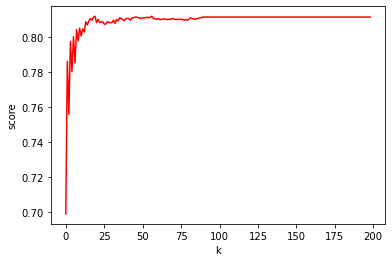

In [20]:
# I tested my model with K=4 but what would be the best K value that gives the greatest score
scores=[]
for i in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(train_data,train_labels)
    scores.append(classifier.score(test_data,test_labels))
x=range(1,200)
y=scores
plt.plot(scores,"r")
plt.xlabel("k")
plt.ylabel("score")
plt.show()

In [28]:
print("From the graph the highest score comes when we get a K value between 20-25. The highest score is around 80% which is fairly accurate and certainly better than random") 

From the graph the highest score comes when we get a K value between 20-25. The highest score is around 80% which is fairly accurate and certainly better than random
